In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [16]:
drawing = False 
mode = True 
ix,iy = -1,-1

In [17]:
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode,img
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                img = np.zeros((512,512,3), np.uint8)
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),2)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)
                
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),2)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)

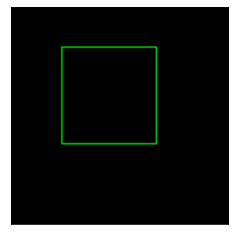

In [18]:
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
        
cv2.destroyAllWindows()
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) 
plt.show()